In [3]:
from matplotlib import pyplot as plt
from sys import version
import sympy as sp
import numpy as np

# Exercise 1-6

In [2]:
n,p,q,N = sp.symbols('n p q N')

u1 = sp.diff((p+q)**N,p)*p
u2=sp.diff(u1,p)*p
u3 = sp.diff(u2,p)*p
u4 = sp.diff(u3,p)*p
display(u2.subs({p+q:1}).simplify())

N*p*(N*p - p + 1)

In [19]:
m12=(2*u1-N)
display(m12.subs({2*p:1,p+q:1}))
m22=4*u2-4*u1*N+N**2
display(m22.subs({p+q:1}))
display(m22.subs({2*p:1,p+q:1,4*p**2:1}))

0

-4*N**2*p + N**2 + 4*p*(N**2*p - N*p + N)

2*N**2*p - N**2 - 2*N*p + 2*N

In [31]:
m32 = 8*u3-12*u2*N+6*u1*N**2-N**3
display(m32.subs({p+q:1,2*p:1}).simplify())
display(N**3-3*N**3+2*N**3-3*N**2+9*N**2-6*N**2-4*N+4*N)

2*N*(2*N**2*p**2 - 3*N**2*p + N**2 - 6*N*p**2 + 9*N*p - 3*N - 4*p + 2)

0

In [38]:
m42=16*u4-32*u3*N+24*u2*N**2-8*u1*N**3+N**4
display(m42.subs({p+q:1,2*p:1}).simplify())
display(N**4-4*N**4+6*N**4-3*N**4+14*N**3-26*N**3+12*N**3+11*N**2-24*N**2+32*N**2-16*N**2+6*N-16*N+8*N)

N*(8*N**3*p**3 - 16*N**3*p**2 + 12*N**3*p - 3*N**3 + 56*N**2*p**2 - 52*N**2*p + 12*N**2 + 88*N*p**3 - 96*N*p**2 + 64*N*p - 16*N + 24*p**2 - 32*p + 8)

3*N**2 - 2*N

# Exercise 1.15

In [4]:
# Para calculo da integral quadratica gaussiana
def gaussxw(N):
    # Aproximação inicial dos polinomios de legendre
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    #Usando método de Newton achamos precisão
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculando pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

Nesse exercícios temos que a probabilidae de ao tentar ligar ter linha disponível imediatamente é
\begin{equation}
    W(m) = \int_0^M \frac{1}{\sqrt{2\pi}\sigma}e^{\frac{-(m-\mu)^2}{2\sigma^2}}dm,
\end{equation}
Se quero saber para qual valor de M essa integral sera pelo menos 1-X, posso fazer o código abaixo

P(69) = 0.661
P(70) = 0.7053
P(71) = 0.7468
P(72) = 0.7849
P(73) = 0.8195
P(74) = 0.8504
P(75) = 0.8775
P(76) = 0.901
P(77) = 0.921
P(78) = 0.9378
P(79) = 0.9516
P(80) = 0.9629
P(81) = 0.9719
P(82) = 0.9791
P(83) = 0.9846
P(84) = 0.9888
P(85) = 0.992
----------------
IDEAL
P(85) = 0.992


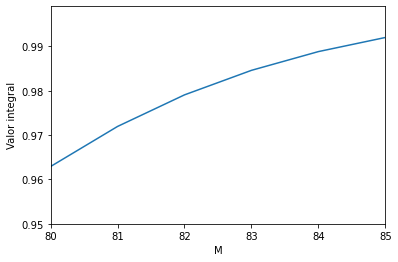

In [23]:
u = 2000/30
sig = np.sqrt(2000/30*29/30)
X=1/100

def f1(z):
    return (1/(np.sqrt(2*np.pi)*sig)) *(np.exp(-(z-u)**2/(2*sig**2)))

W=[]
a=0
i=60
for b in range(70,180,1):
    xp,wp=gaussxwab(i,a,b)
    s=0
    for k in range(i):
        s+=wp[k]*f1(xp[k])
    W.append(s)
    print(f'P({b-1}) = {round(s,4)}')
    if s>=1-X:
        print('----------------')
        print('IDEAL')
        print(f'P({b-1}) = {round(s,4)}')
        break
        


plt.plot(np.arange(69,b,1),W)

plt.xlim(80,85)
plt.ylim(0.95,0.999)
plt.ylabel('Valor integral')
plt.xlabel('M')
plt.show()